## Ejercicio 2

Utilice para entrenamiento y prueba los conjuntos de datos `concent_trn.csv` y `concent_tst.csv`, que consisten en dos clases distribuidas en forma concéntrica como muestra la Figura 1. Determine la estructura de una red de tipo perceptrón multicapa que resulte más apropiada para resolver este problema. Represente gráficamente, con diferentes colores, el resultado de la clasificación realizada por el perceptrón multicapa.

### Solución


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PerceptronMulticapa

def cargarCSV(csvRelativePath, delimeter = ',') -> np.ndarray[any]:
    this_folder = os.path.abspath('') 
    fullPath = os.path.join(this_folder, csvRelativePath)
    return np.loadtxt(fullPath, dtype=float, delimiter=delimeter)

# ===== PARAMETROS =====
max_epocas = 2000
target_error = 0.01

# leer archivos
trnFileConcent = cargarCSV('./data/concent_trn.csv')
tstFileConcent = cargarCSV('./data/concent_tst.csv')

# ===== TRAINING =====
x = trnFileConcent[:,:-1]
yd = trnFileConcent[:,-1]

# Definir variantes
η = [0.1, 0.05, 0.01, 0.001]
neuronas = [[2,1], [2,2,1], [3,1], [3,2,1], [3,3,1]]

redes: list[list[PerceptronMulticapa.PerceptronMulticapa]] = [[PerceptronMulticapa.PerceptronMulticapa(
    cant_entradas=x.shape[1],
    capas=neuronas[j],
    max_epocas=max_epocas,
    tasa_aprendizaje=η[i]
) for i in range(len(η))] for j in range(len(neuronas))]

# Entrenar
trnErr = [[redes[j][i].entrenar(x,yd) for i in range(len(η))] for j in range(len(neuronas))]

In [9]:
# test
x = tstFileConcent[:,:-1]
yd = tstFileConcent[:,-1]
tstErr = [[redes[j][i].test(x,yd) for i in range(len(η))] for j in range(len(neuronas))]

for j in range(len(neuronas)):
    str_neuronas = "["
    for n in neuronas[j]:
        str_neuronas += f"{n},"
    str_neuronas += "]"
    for i in range(len(η)):
        print(f"[neuronas: {str_neuronas}, η: {η[i]}] error de training/testing: {trnErr[j][i]}/{tstErr[j][i]}")

[neuronas: [2,1,], η: 0.1] error de training/testing: 0.3682454969979987/0.369
[neuronas: [2,1,], η: 0.05] error de training/testing: 0.3682454969979987/0.369
[neuronas: [2,1,], η: 0.01] error de training/testing: 0.3682454969979987/0.369
[neuronas: [2,1,], η: 0.001] error de training/testing: 0.3682454969979987/0.369
[neuronas: [2,2,1,], η: 0.1] error de training/testing: 0.3682454969979987/0.369
[neuronas: [2,2,1,], η: 0.05] error de training/testing: 0.1694462975316878/0.177
[neuronas: [2,2,1,], η: 0.01] error de training/testing: 0.3682454969979987/0.369
[neuronas: [2,2,1,], η: 0.001] error de training/testing: 0.3682454969979987/0.369
[neuronas: [3,1,], η: 0.1] error de training/testing: 0.3682454969979987/0.369
[neuronas: [3,1,], η: 0.05] error de training/testing: 0.3682454969979987/0.369
[neuronas: [3,1,], η: 0.01] error de training/testing: 0.01000667111407605/0.007
[neuronas: [3,1,], η: 0.001] error de training/testing: 0.2935290193462308/0.303
[neuronas: [3,2,1,], η: 0.1] er

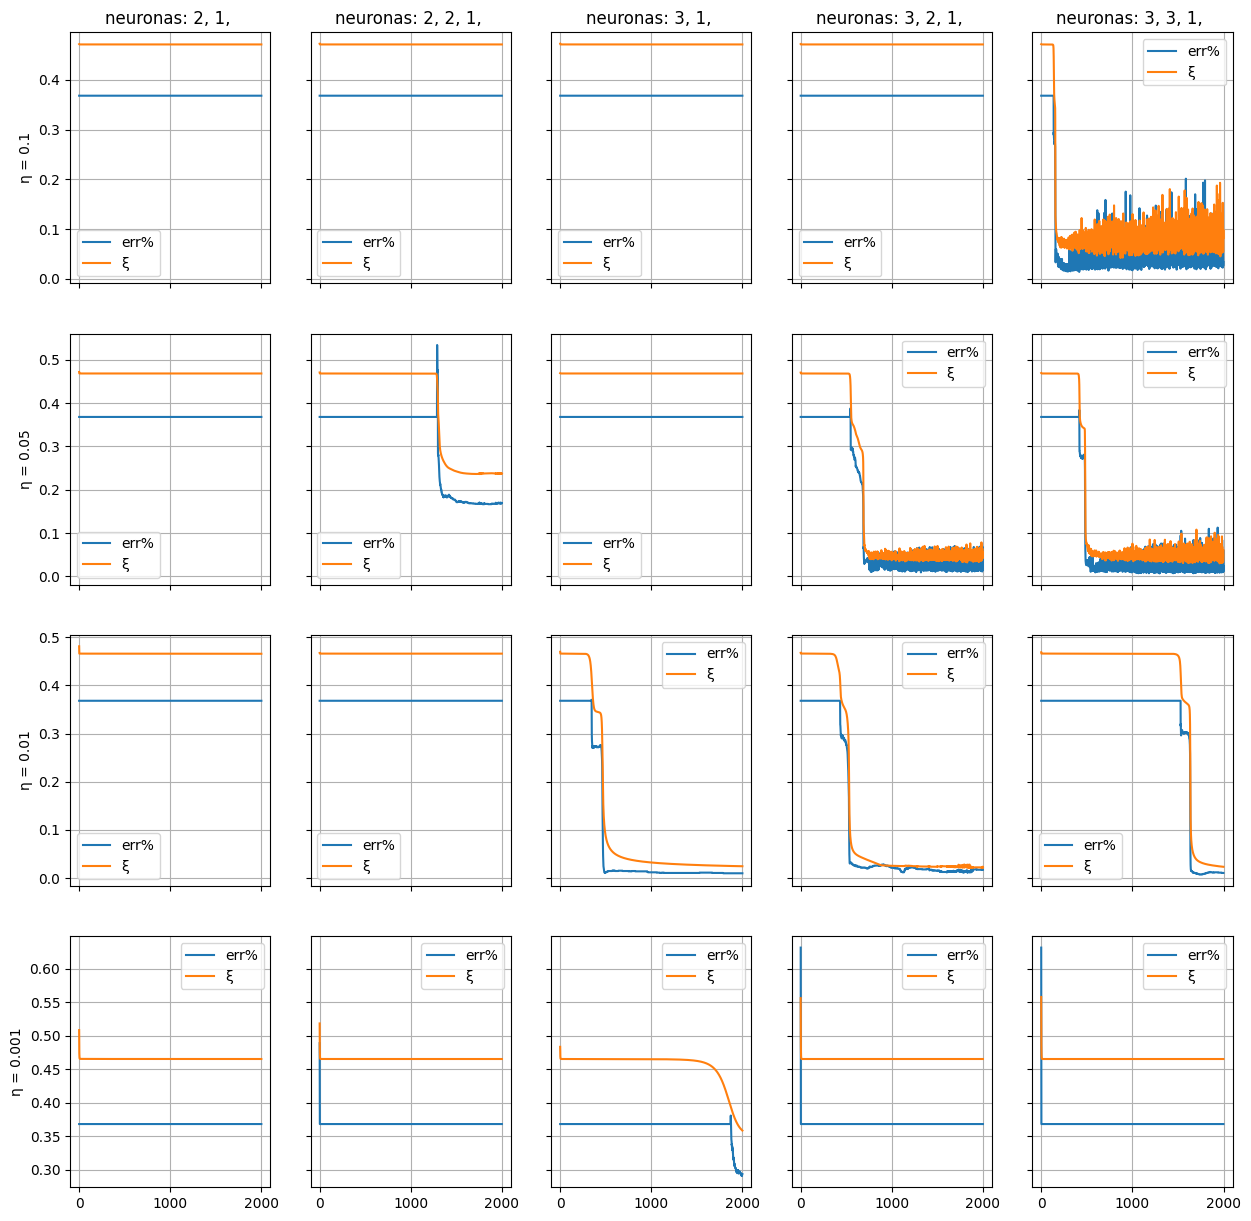

In [10]:
# Gráficas
fig, ax = plt.subplots(len(η), len(neuronas), sharex="col", sharey="row")
fig.set_figwidth(15)
fig.set_figheight(15)
for j in range(len(neuronas)):
    label = "neuronas: "
    for n in neuronas[j]:
        label += f"{n}, "
    ax[0,j].set_title(label)
    for i in range(len(η)):
        if j == 0:
            ax[i,j].set_ylabel(f"η = {η[i]}")
        ax[i,j].grid()
        ax[i,j].plot(redes[j][i].error_history, label="err%")
        ax[i,j].plot(redes[j][i].quaderror_history, label="ξ")
        ax[i,j].legend()

plt.show()